install and import necesscary libraries and using kaggle api token and opendataset to load the data

In [1]:
#Install Libraries
# pip install pandas numpy matplotlib seaborn scikit-learn

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import opendatasets as od

In [3]:
dataset_url = "https://www.kaggle.com/datasets/yasserh/titanic-dataset"
od.download(dataset_url)

Skipping, found downloaded files in ".\titanic-dataset" (use force=True to force download)


In [4]:
file_path = "titanic-dataset/Titanic-Dataset.csv"
titanic_df = pd.read_csv(file_path)


In [5]:
print(titanic_df.head(5))

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


In [6]:
print(titanic_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


Handling missing values and later followed by Data type


In [7]:
titanic_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
missing_percent = titanic_df.isnull().mean() * 100
print(missing_percent)

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64


In [9]:
group_median = titanic_df.groupby(['Pclass', 'Sex'])['Age'].median()

group_median

Pclass  Sex   
1       female    35.0
        male      40.0
2       female    28.0
        male      30.0
3       female    21.5
        male      25.0
Name: Age, dtype: float64

In [10]:
def fill_age(row):
    if pd.isnull(row['Age']):
        return group_median.loc[row['Pclass'], row['Sex']] #example lets say index/row 5 has Age NaN so the group_median where i have pclass and sex using loc i return value >> group_medain.loc[3, male] = 25
    else:
        return row['Age'] #not null rows will be unchanged
    
titanic_df['Age'] = titanic_df.apply(fill_age, axis=1)

In [11]:
titanic_df['Embarked'].fillna(titanic_df['Embarked'].mode()[0], inplace=True)

In [12]:
titanic_df['Deck'] = titanic_df['Cabin'].str[0] #extract the first caracter and create new column Deck
titanic_df['Deck'].fillna('U', inplace=True) #why you ask : grouping passengers by deck letter helps later on for capturing potential survival patterns related to ship location
titanic_df['Deck'].value_counts()

Deck
U    687
C     59
B     47
D     33
E     32
A     15
F     13
G      4
T      1
Name: count, dtype: int64

In [13]:
titanic_df.drop('Cabin', axis=1, inplace= True)

Convert Categorical Feature into Numerical Using Encoding

In [14]:
titanic_df['Sex'] = titanic_df['Sex'].map({'male': 1, 'female':2}) 

In [15]:
titanic_df = pd.get_dummies(titanic_df, columns=['Embarked', 'Deck'], drop_first=True)


In [20]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 20 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    int64  
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked_Q   891 non-null    bool   
 11  Embarked_S   891 non-null    bool   
 12  Deck_B       891 non-null    bool   
 13  Deck_C       891 non-null    bool   
 14  Deck_D       891 non-null    bool   
 15  Deck_E       891 non-null    bool   
 16  Deck_F       891 non-null    bool   
 17  Deck_G       891 non-null    bool   
 18  Deck_T       891 non-null    bool   
 19  Deck_U  

Visualization

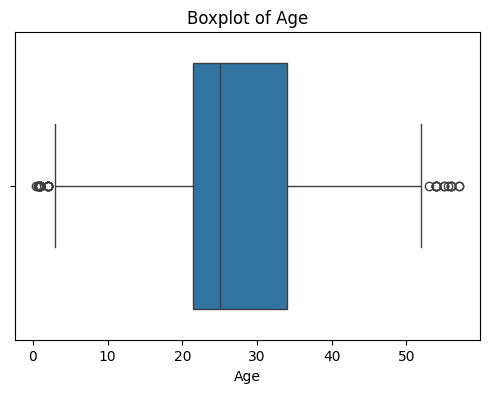

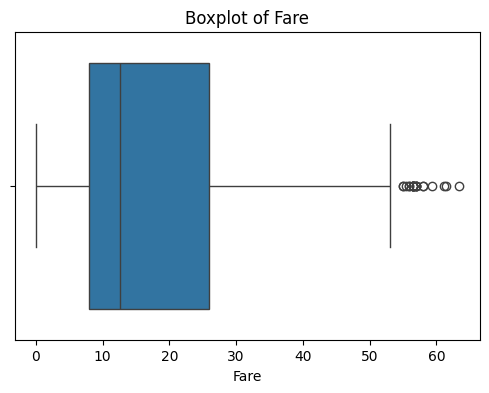

In [22]:
int_cols = titanic_df.select_dtypes(include=['float']).columns


for col in int_cols:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=titanic_df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

 

In [21]:
def outlier_fn(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    LB = Q1 - 1.5 * IQR
    UB = Q3 + 1.5 * IQR
    print(f"{column} - Lower bound: {LB}")
    print(f"{column} - Upper bound: {UB}")
    
    filtered_df = df[(df[column] >= LB) & (df[column] <= UB)]
    print(f"Removed {df.shape[0] - filtered_df.shape[0]} outliers from {column}")
    return filtered_df

titanic_df = outlier_fn(titanic_df, 'Age')
titanic_df = outlier_fn(titanic_df, 'Fare')

Age - Lower bound: -0.25
Age - Upper bound: 57.75
Removed 33 outliers from Age
Fare - Lower bound: -26.0105
Fare - Upper bound: 64.4063
Removed 109 outliers from Fare


Normalize the numerical feature

In [23]:
from sklearn.preprocessing import StandardScaler

con_num_col = ['Age', 'Fare']

scaler = StandardScaler()
titanic_df[con_num_col] = scaler.fit_transform(titanic_df[con_num_col])

print(titanic_df[con_num_col].head())

        Age      Fare
0 -0.456511 -0.772036
2 -0.108162 -0.721286
3  0.675625  2.675187
4  0.675625 -0.711888
5 -0.195249 -0.681190


In [24]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked_Q,Embarked_S,Deck_B,Deck_C,Deck_D,Deck_E,Deck_F,Deck_G,Deck_T,Deck_U
0,1,0,3,"Braund, Mr. Owen Harris",1,-0.456511,1,0,A/5 21171,-0.772036,False,True,False,False,False,False,False,False,False,True
2,3,1,3,"Heikkinen, Miss. Laina",2,-0.108162,0,0,STON/O2. 3101282,-0.721286,False,True,False,False,False,False,False,False,False,True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",2,0.675625,1,0,113803,2.675187,False,True,False,True,False,False,False,False,False,False
4,5,0,3,"Allen, Mr. William Henry",1,0.675625,0,0,373450,-0.711888,False,True,False,False,False,False,False,False,False,True
5,6,0,3,"Moran, Mr. James",1,-0.195249,0,0,330877,-0.681190,True,False,False,False,False,False,False,False,False,True


In [25]:
titanic_df.to_csv('titanic_cleaned.csv', index=False)

In [27]:
cleaned_data = pd.read_csv(r"titanic_cleaned.csv")

In [28]:
cleaned_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked_Q,Embarked_S,Deck_B,Deck_C,Deck_D,Deck_E,Deck_F,Deck_G,Deck_T,Deck_U
0,1,0,3,"Braund, Mr. Owen Harris",1,-0.456511,1,0,A/5 21171,-0.772036,False,True,False,False,False,False,False,False,False,True
1,3,1,3,"Heikkinen, Miss. Laina",2,-0.108162,0,0,STON/O2. 3101282,-0.721286,False,True,False,False,False,False,False,False,False,True
2,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",2,0.675625,1,0,113803,2.675187,False,True,False,True,False,False,False,False,False,False
3,5,0,3,"Allen, Mr. William Henry",1,0.675625,0,0,373450,-0.711888,False,True,False,False,False,False,False,False,False,True
4,6,0,3,"Moran, Mr. James",1,-0.195249,0,0,330877,-0.681190,True,False,False,False,False,False,False,False,False,True
